In [1]:
#imports
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



# The Remarkable Efficiency of Attention
### Or: How I Learned to Stop Worrying and Love the Transformer

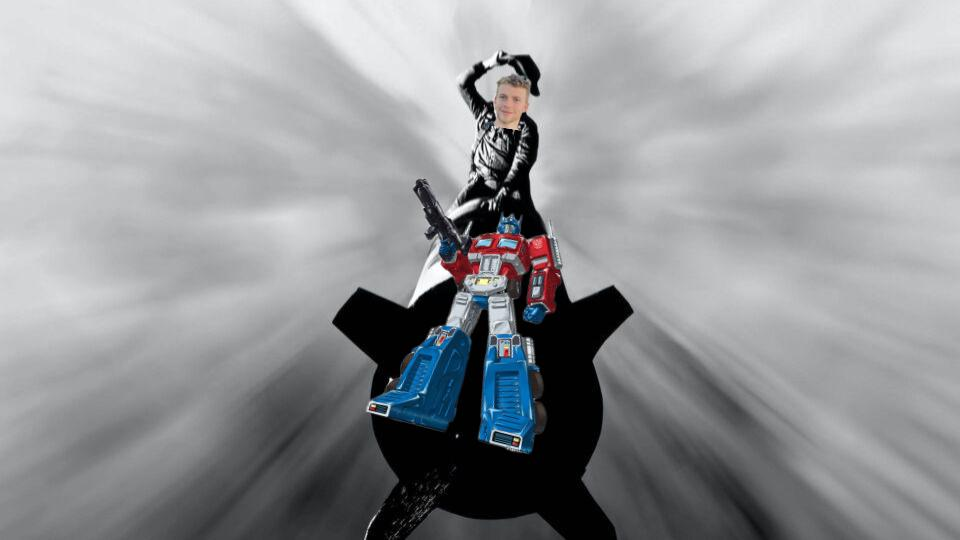

# Plan for Today

# *Speaker Notes*

- Start with the basics and move quickly
- The goal is for everyone to learn something regardless of background

## 1. Background
- 1.1 About Me
- 1.2. The What and Why of Deep Learning 
- 1.3 Feedforward Neural Nets
- 1.4 Activation Functions
- 1.5 Backpropagation
- 1.6 Bonus Material - Building a Simple Feed Forward Neural Net

## 2. Sequence Modelling
- 2.1 Sequence Modelling Example - Next Value Prediction in a Sine Wave Sequence
- 2.2 RNNs
    - 2.2.1 RNNs and Long-Term Dependencies
- 2.3 LSTMs

## 3.  Understanding the Transformer
- 3.1 Motivation for Transformers
- 3.2 Matching Queries and Keys
- 3.3 Attention 
- 3.4 Self-Attention Mechanism
- 3.5 Self-Attention in Action
- 3.6 From Attention to Transformers

## 4. Building Our Own GPT
- 4.1 Limitations
- 4.2 Next Steps

## 5. Wrap-Up
- 5.1 References and Resources
- 5.2 What's Next? 

## 6. Join Our Community - AI Builders Doing Data Better

# 1. Background


## 1.1 About Me
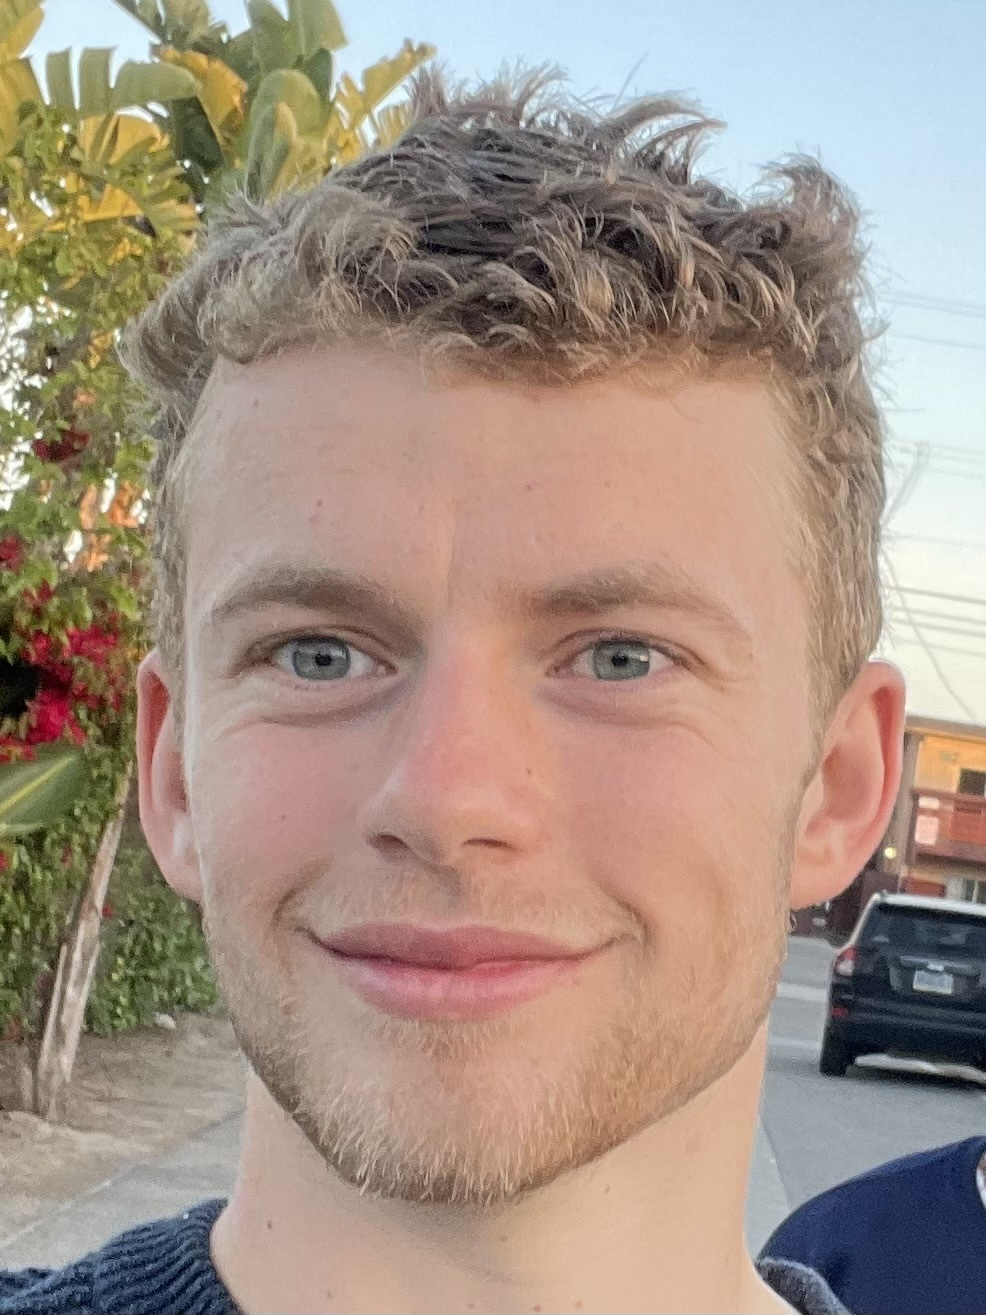


Hi, I'm Tony

- I'm the Applied AI Lead at an in-stealth Dublin-based start-up launching next month.
- I spend my time building more robust and trustworthy AI applications on top of our unique data supply chain platform.
- In my evenings I do research with the Yale/EPFL LiGHT lab, where I work with the Red Cross using modular neural networks for humanitarian datasets with systematic missingness..
- [LinkedIn](https://www.linkedin.com/in/tony-o-halloran-38098a142/) 
- [Twitter](https://x.com/tonyohalloran) @tonyohalloran
- [Website](tonyohalloran.ie) [tonyohalloran.ie](tonyohalloran.ie)


## 1.2 The What and Why of Deep Learning 

- Uses large amounts of data to approximate complex functions
- Until the last ~ 15 years *machine learning* relied heavily on *feature engineering*

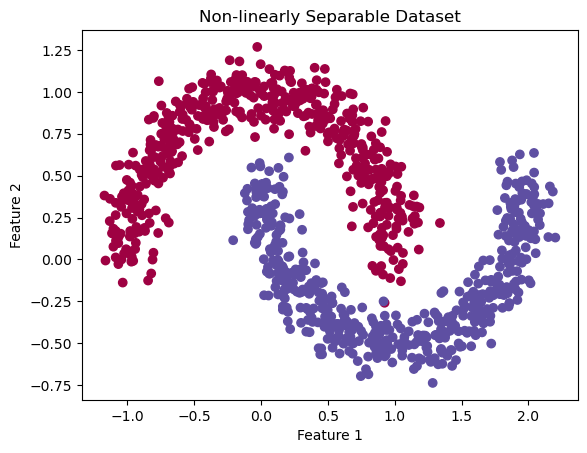

In [2]:
# generate a non-linearly separable dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Non-linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



# *Speaker Notes The What and Why of Deep Learning* 
- Uses large amounts of data to approximate complex functions
- Until the last ~ 15 years *machine learning* relied heavily on what's called *feature engineering*

- **Features** - Transformation of input data that facilitates the tasks that we want to solve
- **Feature Engineering** - Coming up with the right features to help solve the task

Take the task of differentiating handwritten digits. 
Features - straight lines, curved edges etc  

We can all easily recognize a cat from a dog, but hand-writing a program to tell cats and dogs apart is nearly impossible

Tedious and brittle 

Alternative - **Deep Learning** - Discover representations from data. 
- The algorithm is *trained* to extract the features automatically and is driven by feedback.


# 1.3 Feedforward Neural Nets (FNN)

- **Neuron**: 
    - Weights
    - Biases
    - Activation Functions


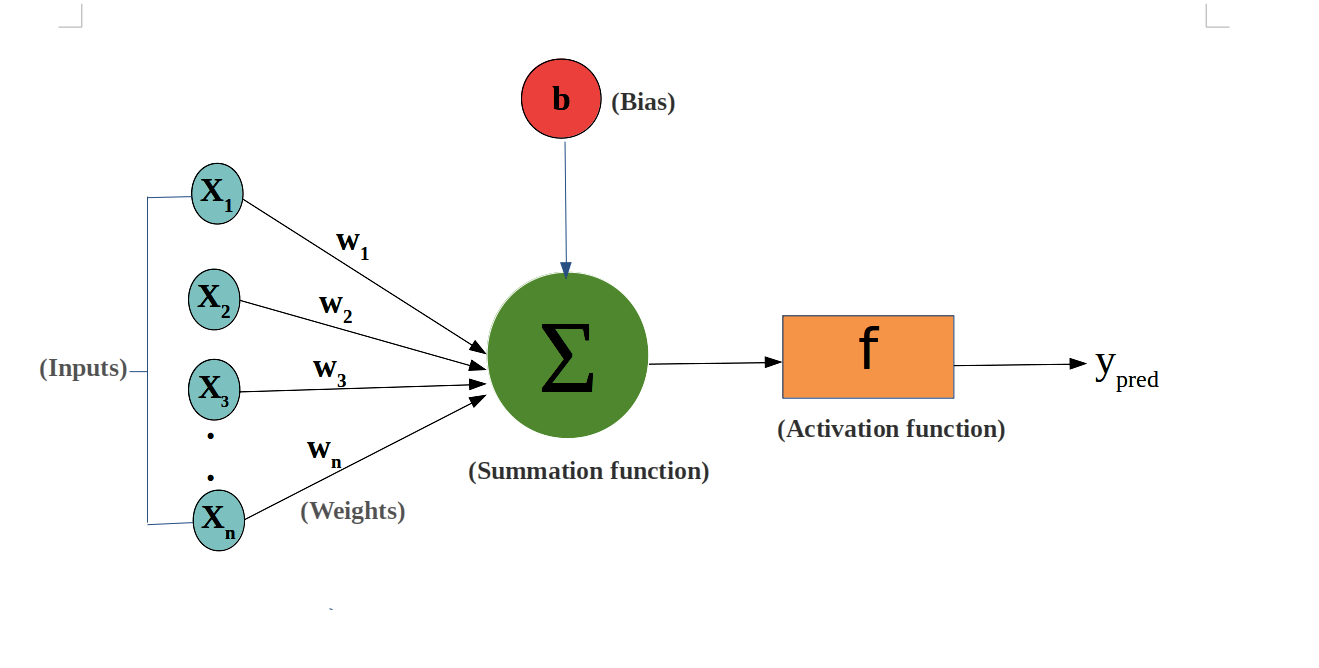

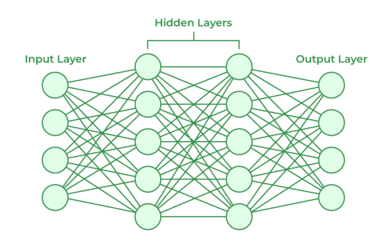

- **Layers and Abstractions**
  - Input Layer
  - Hidden Layers
  - Output Layer

# *Speaker Notes* Feedforward Neural Nets (FNN)

FFNS allow us to approximate any arbitartily complex function. 

#### 1. **Structure of a Neural Network**


- **Neuron**: Basic unit of a NN, which receive inputs, process them, and pass outputs to other neurons.
    - **Weights**: Parameters that determine the strength and direction of the connection between neurons. They are adjusted during training to minimize the error in predictions.
    - **Biases**: Additional parameters in each neuron that allow the model to fit the data better by providing a way to shift the activation function.
    - **Activation Functions**: Applied to the output of each neuron. They introduce non-linearity. Without them, NNs would only be able to learn linear functions. 

- **Layers**: Neurons are organized into layers:
  - **Input Layer**: The first layer, which receives the raw data.
  - **Hidden Layers**: Intermediate layers where the neurons perform computations and extract features from the data.
  - **Output Layer**: The final layer, which produces the network's prediction or decision.

#### Training Steps

1. **Initialization**: Set initial weights and biases.
2. **Forward Propagation**: Process data through the network to get predictions.
3. **Loss Calculation**: Compare predictions to actual values.
4. **Backpropagation**: Adjust weights to minimize loss.
5. **Iteration**: Repeat the process to improve performance.

#### Training Steps
1. Initialization
2. Forward Propagation
3. Loss Calculation
4. Backpropagation
5. Iteration

## 1.4 Activation Functions

#### Sigmoid Activation Function

The sigmoid activation function is a type of logistic function that maps any real-valued number into a value between 0 and 1. The sigmoid function is defined as:

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

**Use Case:**
The sigmoid function is often used in the output layer of binary classification problems.


#### GELU (Gaussian Error Linear Unit) Activation Function

The GELU activation function is a more recent development that combines properties of both linear and non-linear activation functions. It is defined as:

$$ \text{GELU}(x) = x \cdot \Phi(x) $$

where $ \Phi(x) $ is the cumulative distribution function of the standard normal distribution. A simpler, approximate form commonly used in practice is:

$$ \text{GELU}(x) = 0.5x \left(1 + \tanh\left(\sqrt{\frac{2}{\pi}} (x + 0.044715x^3)\right)\right) $$

**Use Case:**
GELU is particularly popular in Transformer-based models, where it has shown to improve performance over other activation functions like ReLU and its variants.


#### Softmax Activation Function

The softmax activation function is used to convert a vector of values into a probability distribution. The softmax function is defined as:

$$ \text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}} $$

for \( i = 1, 2, ..., n \), where \( n \) is the number of classes.

**Use Case:**
The softmax function is commonly used in the output layer of neural networks for multi-class classification problems, ensuring that the output probabilities sum to 1.

In [3]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the GELU function (using the approximate form)
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))


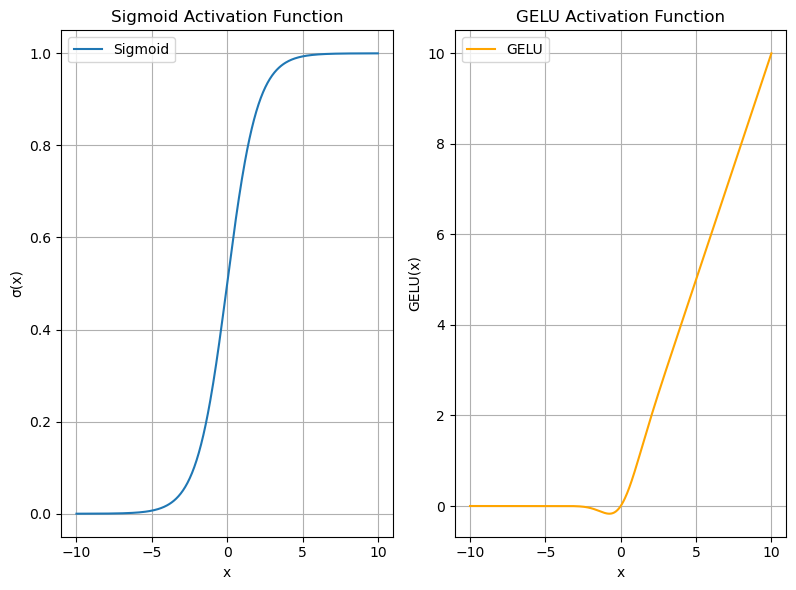

In [4]:
# Generate x values for sigmoid and GELU
x = np.linspace(-10, 10, 400)

# Compute y values for sigmoid and GELU
sigmoid_y = sigmoid(x)
gelu_y = gelu(x)

# Plotting
plt.figure(figsize=(12, 6))
# Plot Sigmoid
plt.subplot(1, 3, 1)
plt.plot(x, sigmoid_y, label='Sigmoid')
plt.title('Sigmoid Activation Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.legend()
# Plot GELU
plt.subplot(1, 3, 2)
plt.plot(x, gelu_y, label='GELU', color='orange')
plt.title('GELU Activation Function')
plt.xlabel('x')
plt.ylabel('GELU(x)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## 1.5 Backpropagation


1. Forward Pass
2. Compute Loss
3. Backward Pass
4. Update Weights and Biases


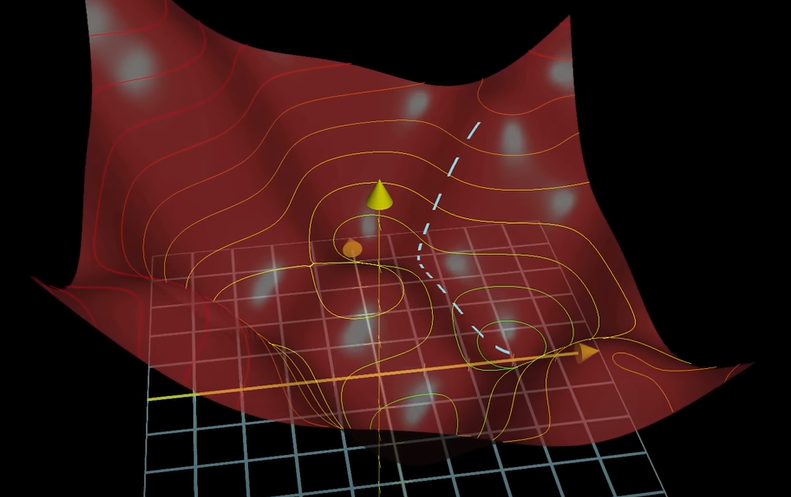

# *Speaker Notes - Backprop*

Backpropagation is the algorithm used to compute the gradients for gradient descent in neural networks. It works by propagating the error backwards through the network from the output layer to the input layer. The main steps are:

1. **Forward Pass**: Perform forward propagation to compute the output of the network.
2. **Compute Loss**: Calculate the loss between the predicted output and the actual target.
3. **Backward Pass**: 
- **Output Layer**: Compute the gradient of the loss with respect to the output of the neurons in the output layer.
- **Hidden Layers**: Propagate the gradient backwards through each hidden layer, computing the gradient of the loss with respect to the outputs of the neurons in each layer.
4. **Update Weights and Biases**: Use the gradients computed during the backward pass to update the weights and biases using gradient descent.

By repeating these steps, the neural network iteratively reduces the loss, improving its predictions.

## 1.6 Bonus Material - Building a Simple Feed Forward Neural Net
This implementation of a simple shallow neural net with stochastic gradient descent and a single hidden layer builds on top of my logistic regressor implementation.

* For simplicity and readability, the sigmoid function and its derivative are defined outside of the function for the shallow neural net.
* Firstly, as in the logistic regression algorithm, the weights and biases are initialised to small random values.
* Because we are implementing stochastic gradient descent, a single training case is selected at a time.
* In the forward propagation step, the output prediction y_hat is computed for the training case. Then, in the backprop step, the error for this single training case is calculated (delta2), and then the error is propagated back to the hidden layer to get delta1. The weights and biases of the network are updated in the direction that reduces the error, scaled by the set learning rate alpha.
* Just as in the logistic regressor implementation, we stop training if convergence is reached or if we reach a maximum number of iterations without convergence.
* The final weights (W1, W2) and biases (b1, b2) represent the learned parameters of the network and can be used to make predictions on new data points.


In [5]:
# define the logistic / sigmoid function
def logistic_function(z):
    return 1 / (1 + np.exp(-z))


# define the derivative of the logistic / sigmoid function
def sigmoid_derivative(x):
    return logistic_function(x) * (1 - logistic_function(x))

In [6]:
# define the shallow_neural_net
def shallow_neural_network(X, y, n_hidden):
    np.random.seed(0)  # setting random seed for reproducibility
    alpha = 0.01  # learning rate
    max_iterations = 1000000  # maximum number of iterations
    threshold = 1e-4  # convergence threshold
    N, n_input = X.shape  # number of examples and input features

    # initalise weights and biases to valid initial values (small random values)
    W1 = np.random.normal(0, 0.01, (n_input, n_hidden))  # weights from input to hidden layer
    b1 = np.random.normal(0, 0.01, n_hidden)  # biases for hidden layer
    W2 = np.random.normal(0, 0.01, n_hidden)  # weights from hidden to output layer
    b2 = np.random.normal(0, 0.01)  # bias for output layer

    # initialize variables related to the stopping criteria
    stopping = False
    J_running = 0
    J_running_prev = 0
    iteration = 0

    while not stopping:
        # select a training example at random
        random_case = np.random.randint(N)
        x_i = X[random_case, :]
        y_i = y[random_case]

        # forward prop stage
        z1 = np.dot(x_i, W1) + b1
        a1 = logistic_function(z1)
        z2 = np.dot(a1, W2) + b2
        y_hat = logistic_function(z2)  # output prediction

        # back prop stage
        delta2 = y_hat - y_i
        delta1 = np.dot(W2, delta2) * sigmoid_derivative(z1) #

        # update weights and biases
        for j in range(n_hidden):
            W2[j] -= alpha * delta2 * a1[j]
            b2 -= alpha * delta2
            for i in range(n_input):
                W1[i, j] -= alpha * delta1[j] * x_i[i]
                b1[j] -= alpha * delta1[j]

        # compute the current cost
        J_current = -np.sum(y_i * np.log(y_hat) + (1 - y_i) * np.log(1 - y_hat))

        # check stopping criteria

        iteration += 1
        J_running += J_current

        if iteration > max_iterations:  # failed to converge
            stopping = True
            print("Stopping: Reached maximum iterations without convergence.")

        if iteration % N == 0:  # test for convergence on the batch
            if abs(J_running - J_running_prev) < threshold:
                stopping = True
            J_running_prev = J_running
            J_running = 0  # reset cost for the next N iterations

    # reshape the weights into the correct format
    W1 = W1.reshape(n_input, n_hidden)
    W2 = W2.reshape(n_hidden, 1)

    return W1, b1, W2, b2 # return the trained weights and biases

In [7]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the shallow neural network on the moons dataset
W1, b1, W2, b2 = shallow_neural_network(X_train, y_train, n_hidden=4)


Stopping: Reached maximum iterations without convergence.


In [8]:
# Define the prediction function
def predict(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = logistic_function(z1)
    z2 = np.dot(a1, W2) + b2
    y_hat = logistic_function(z2)  # output predictions as probabilities
    return y_hat

# convert probabilities to class labels
def predict_labels(y_hat, threshold=0.5):
    return (y_hat > threshold).astype(int)

# predictions
y_hat_prob = predict(X_test, W1, b1, W2, b2)
y_pred = predict_labels(y_hat_prob)

# classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# 2. Sequence Modelling
- Sequence Data: Stock prices, audio, natural language

- FNNs struggle with sequence modelling: 
    - Temporal Dependencies
    - Expectation of Fixed Input Size

# *Speaker Notes* Notes Motivating Problem - Sequence Modelling 

Lack of Temporal Dependencies: Simple feed-forward neural networks are not designed to handle temporal dependencies or sequential patterns in data. They process each input independently without considering the order or context provided by previous inputs, making them unsuitable for tasks like time series prediction or language modeling where the sequence of data points is crucial.

Fixed Input Size: Feed-forward neural networks typically require a fixed-size input, which is not ideal for sequence modeling where input lengths can vary. This limitation makes it challenging to apply them directly to tasks involving variable-length sequences, such as natural language processing or speech recognition, without extensive pre-processing or padding.

## 2.1 Sequence Modelling Example - Next Value Prediction in a Sine Wave Sequence

**Objective**:
- To predict the next value in a sequence of sine wave values using a Simple Recurrent Neural Network (RNN).
- This is an example of many-to-one sequence prediction

**Data Generation**:
- Generate sequences of sine wave values.
- For each sequence, use the first n-1 values as the input and the n-th value as the target.

In [9]:
# Function to create sample data with noise
def create_data(seq_length, num_samples, noise_std=0.025):
    X = []
    y = []
    for _ in range(num_samples):
        start = np.random.rand() * 2 * np.pi
        end = start + seq_length * 0.1
        seq = np.sin(np.linspace(start, end, seq_length))
        seq += np.random.normal(0, noise_std, seq.shape)  # Add Gaussian noise
        X.append(seq[:-1])
        y.append(seq[-1])
    return np.array(X), np.array(y)
# Parameters for the sample data
seq_length = 10
num_samples = 1000

# Generate the sample data with reduced noise
X, y = create_data(seq_length, num_samples)
# Convert the data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

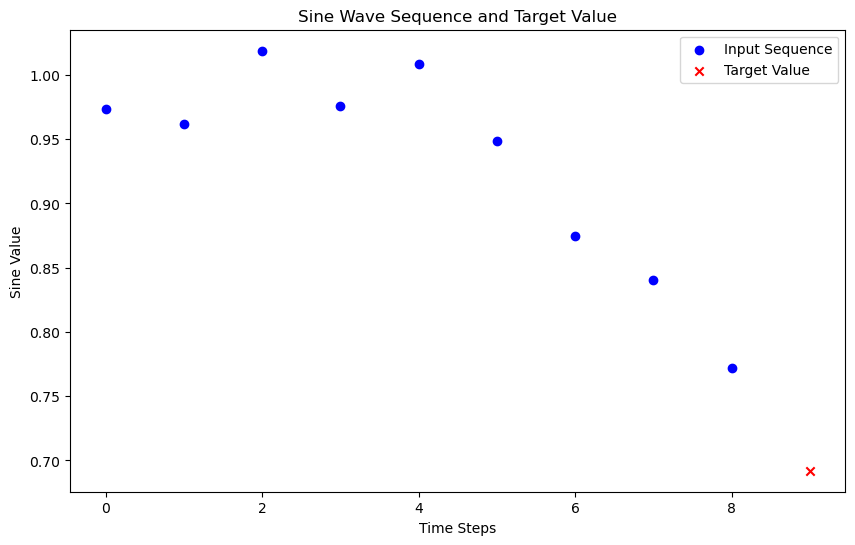

In [10]:
# Plotting the sequence and the target value
plt.figure(figsize=(10, 6))
# Plot the first sequence from the data
plt.scatter(range(seq_length - 1), X[0], color='blue', marker='o', label='Input Sequence')
# Plot the target value
plt.scatter(seq_length - 1, y[0], color='red', marker='x', label='Target Value')
# Adding labels and title
plt.xlabel('Time Steps')
plt.ylabel('Sine Value')
plt.title('Sine Wave Sequence and Target Value')
plt.legend()
plt.show()


## 2.2 RNNs

In **feed-forward NNs**, data flows forward from **earlier layers to later layers**.

**Recurrent networks** - data flows forward but also flows ‘backward’ from later layers (in this time step) to earlier layers (in the next time step) 
- There is a hidden state, which is like a memory that captures information from previous time steps.
- This hidden state is updated at each time step based on the current input and the previous hidden state.

- RNNs allow us to do all sorts of tasks
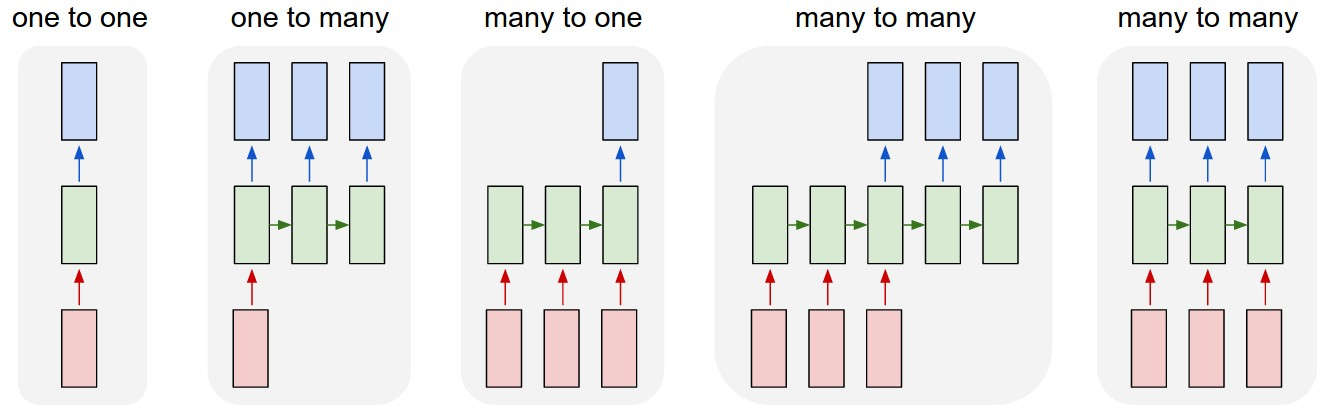

## *Speaker Notes* on sequence modelling 


- 1) One-to-one 
    - FNN, from fixed-sized input to fixed-sized output (e.g. image classification). 
- 2) One-to-many 
    - Takes in a single input e.g. an image and returns a sequence output - a sentence caption for the image 
- 3) Many-to-one
    - Sequence input (e.g. sentiment analysis where a given sentence is classified as expressing positive or negative sentiment). 
- 4) Many-to-many 
    - Sequence input and sequence output (e.g. Machine Translation: an RNN reads a sentence in English and then outputs a sentence in French). 
- 5) Many-to-many synced
    - Synced sequence input and output (e.g. video classification where we wish to label each frame of the video). 

- Notice that in every case where we use a RNNS there is no pre-specified constraints on the length of sequences

In [11]:
# Define the RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameters for the model
input_size = 1
hidden_size = 16
output_size = 1
num_epochs = 100
learning_rate = 0.01

# Instantiate the model, loss function, and optimizer
rnn_model = SimpleRNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn_model.parameters(), lr=learning_rate)


In [12]:
# Training loop for RNN
rnn_train_losses = []
rnn_test_losses = []

for epoch in range(num_epochs):
    rnn_model.train()
    outputs = rnn_model(X_train)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        rnn_model.eval()
        with torch.no_grad():
            train_loss = criterion(rnn_model(X_train), y_train).item()
            test_loss = criterion(rnn_model(X_test), y_test).item()
            rnn_train_losses.append(train_loss)
            rnn_test_losses.append(test_loss)
            print(f'RNN Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
            

RNN Epoch [10/100], Train Loss: 0.0882, Test Loss: 0.0803
RNN Epoch [20/100], Train Loss: 0.0353, Test Loss: 0.0365
RNN Epoch [30/100], Train Loss: 0.0099, Test Loss: 0.0080
RNN Epoch [40/100], Train Loss: 0.0040, Test Loss: 0.0033
RNN Epoch [50/100], Train Loss: 0.0026, Test Loss: 0.0025
RNN Epoch [60/100], Train Loss: 0.0022, Test Loss: 0.0020
RNN Epoch [70/100], Train Loss: 0.0020, Test Loss: 0.0018
RNN Epoch [80/100], Train Loss: 0.0018, Test Loss: 0.0018
RNN Epoch [90/100], Train Loss: 0.0017, Test Loss: 0.0016
RNN Epoch [100/100], Train Loss: 0.0017, Test Loss: 0.0016


### 2.2.1 RNNs and Long-Term Dependencies 
- RNNs can become very deep; if we have a long sequence we have a lot of steps forward in the neural network
- When we multiply steps out in backpropogation the gradients often vanish or explode over time
    - infomation from early steps in the sequence is forgotten 

## 2.3 Long Short-Term Memory (LSTM)

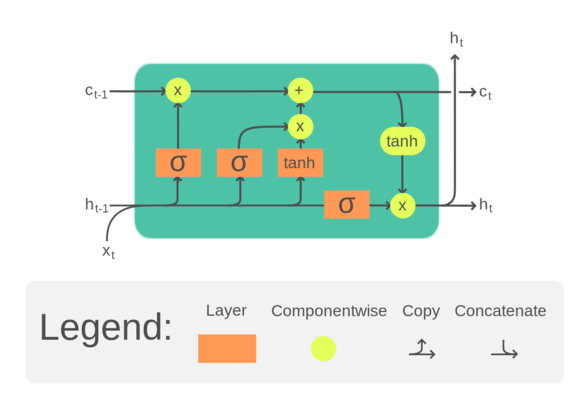

- LSTM cells were introduced in 1997 to address the issues that basic RNNs face with long-term dependencies.
- Main difference **gates** input, output and forget
    - allow the networks to selectively remember or forget information

# *Speaker Notes* LSTM
- Long Short-Term Memory (LSTM) networks are a type of Recurrent Neural Network (RNN) introduced as a solution to the limitations of standard RNNs.

- Gating Mechanism: The gates control the flow of information into, out of, and through the cell state, making it possible to retain relevant information for long periods and discard irrelevant information.
- Has two state vectors, the memory state and the cell state
    - the memory state is equivalent to the hidden state in traditional RNNs
    - Cell State: The cell state acts as the long short-term memory that carries information across time steps relatively unchanged, allowing the network to remember important information over long sequences.

In [13]:
# Define the LSTM model
class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out            

In [14]:
# Instantiate the model, loss function, and optimizer
lstm_model = SimpleLSTM(input_size, hidden_size, output_size)
optimizer = optim.Adam(lstm_model.parameters(), lr=learning_rate)

# Training loop for LSTM
lstm_train_losses = []
lstm_test_losses = []

for epoch in range(num_epochs):
    lstm_model.train()
    outputs = lstm_model(X_train)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        lstm_model.eval()
        with torch.no_grad():
            train_loss = criterion(lstm_model(X_train), y_train).item()
            test_loss = criterion(lstm_model(X_test), y_test).item()
            lstm_train_losses.append(train_loss)
            lstm_test_losses.append(test_loss)
            print(f'LSTM Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
            

LSTM Epoch [10/100], Train Loss: 0.1587, Test Loss: 0.1696
LSTM Epoch [20/100], Train Loss: 0.0582, Test Loss: 0.0535
LSTM Epoch [30/100], Train Loss: 0.0088, Test Loss: 0.0092
LSTM Epoch [40/100], Train Loss: 0.0076, Test Loss: 0.0085
LSTM Epoch [50/100], Train Loss: 0.0034, Test Loss: 0.0031
LSTM Epoch [60/100], Train Loss: 0.0023, Test Loss: 0.0022
LSTM Epoch [70/100], Train Loss: 0.0018, Test Loss: 0.0019
LSTM Epoch [80/100], Train Loss: 0.0015, Test Loss: 0.0014
LSTM Epoch [90/100], Train Loss: 0.0013, Test Loss: 0.0013
LSTM Epoch [100/100], Train Loss: 0.0012, Test Loss: 0.0012


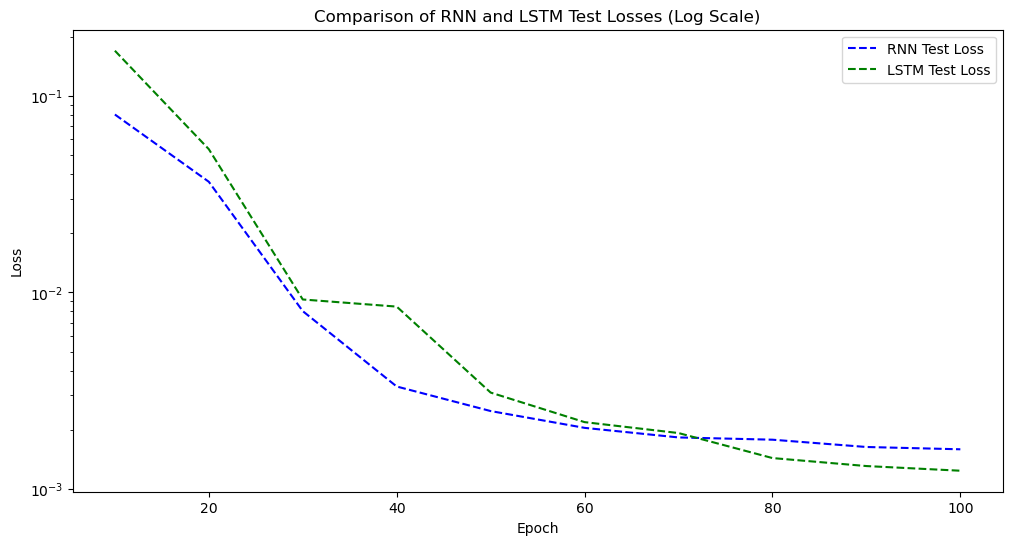

In [15]:
# Plotting the test losses for RNN and LSTM with a log scale
plt.figure(figsize=(12, 6))
plt.plot(range(10, num_epochs + 1, 10), rnn_test_losses, label='RNN Test Loss', color='blue', linestyle='--')
plt.plot(range(10, num_epochs + 1, 10), lstm_test_losses, label='LSTM Test Loss', color='green', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Comparison of RNN and LSTM Test Losses (Log Scale)')
plt.legend()
plt.show()


# 3. Understanding the Transformer
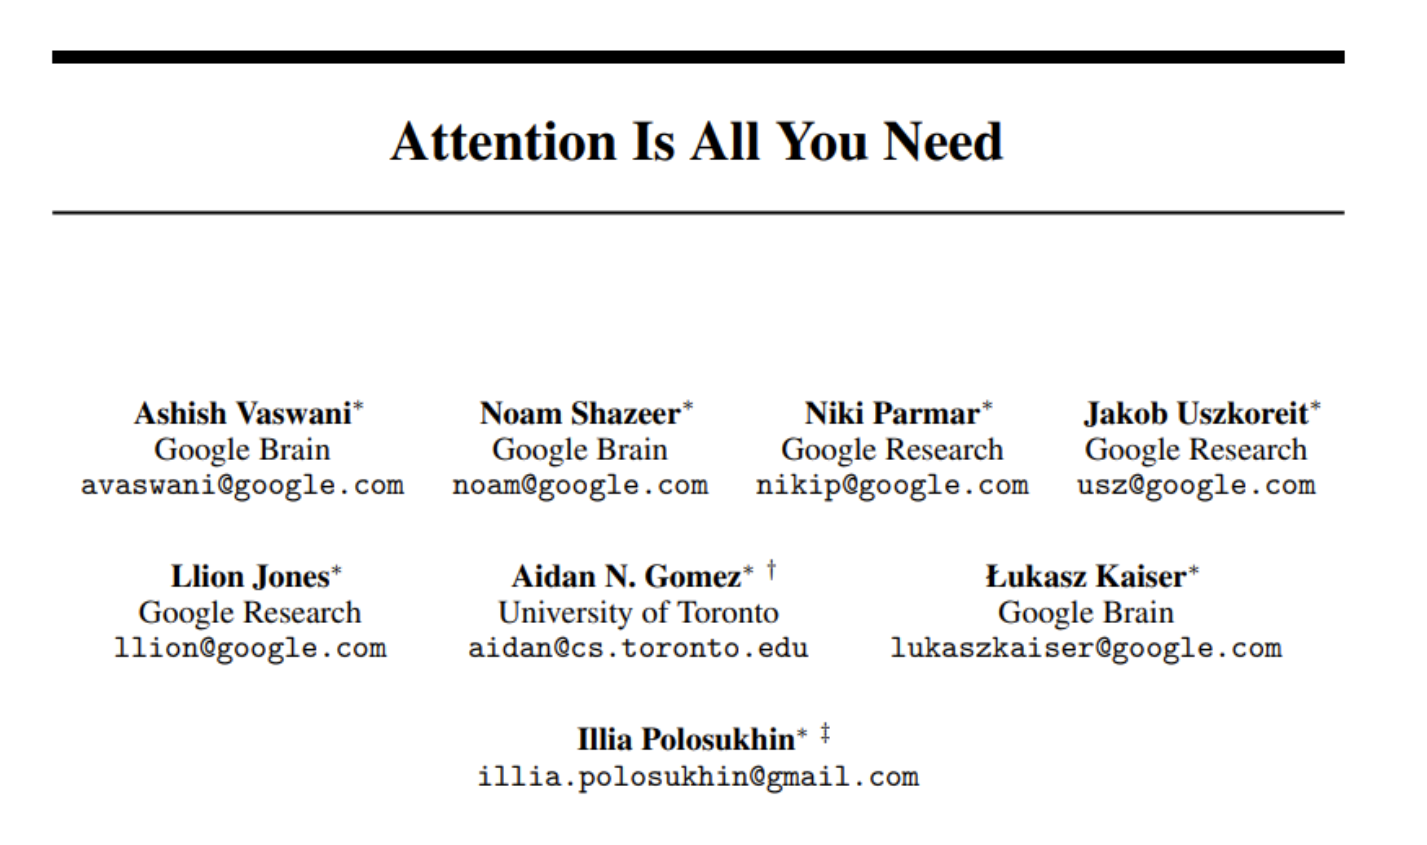

## 3.1 Motivation for Transformers
- Parallelism: RNNs, such as LSTMs, handle text sequentially, making them slow to train.
    - Transformers: Use parallel processing, allowing them to model long-range dependencies more effectively and handle larger contexts simultaneously.


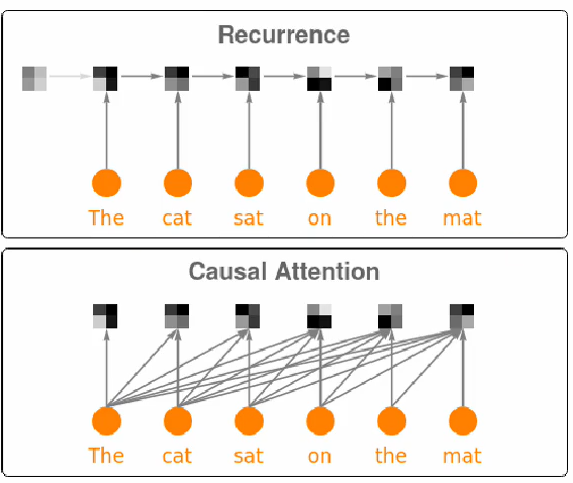



## Attention
- **Key idea - not all information is equally important**

## 3.2 Matching Queries and Keys
Consider database lookup - we have some query, and we check it against all the keys in the database - if there is a match, the value that corresponds to that key is returned as the result. 
This is **hard matching** - an exact match is required.

In [16]:
# example of hard matching, the names of the fruits are our keys and their prices in € are the value

database = {
    "apple": "€6",  
    "banana": "€7.",
    "carrot": "€11.",
    "date": "€89"
}

# query
query = "banana"

# hard match lookup
def hard_match(database, query):
    if query in database:
        return database[query]
    else:
        return "No exact match found."

result = hard_match(database, query)
print(f"Hard Match Result: {result}")


Hard Match Result: €7.


## 3.3 Attention 
- Attention uses **soft-matching**

### *Speaker Notes* Vocabulary and Tokens

- **Tokens**: Tokens can be whole words, word chunks, or even individual characters. They are the smallest units of meaning in the model's vocabulary.

- **GPT-2 Vocabulary Size**: GPT-2 has a vocabulary consisting of 50,257 distinct tokens.

- **Token Vectors**: Each token in GPT-2's vocabulary is associated with a vector representation. For GPT-2, these vectors have a dimensionality of 768.

### Attention Mechanisms and Similarity

- **Dot-Product Similarity**: Attention mechanisms use dot-product similarity to measure how similar two vectors are.

- **Cosine Similarity**: Dot-product similarity indirectly measures the cosine of the angle between vectors. A higher dot product indicates a smaller angle and greater similarity between the vectors.

- **Significance**: This similarity measure helps the model identify and focus on related tokens within a sequence, enhancing its understanding and generation capabilities.

In [17]:
# Define three vectors: A, B, and C with adjusted B and C
vector_a = np.array([4, 3])
vector_b = np.array([1.5, 2.5])  # Slightly less similar to A
vector_c = np.array([-3, -1])    # Negative dot product with A


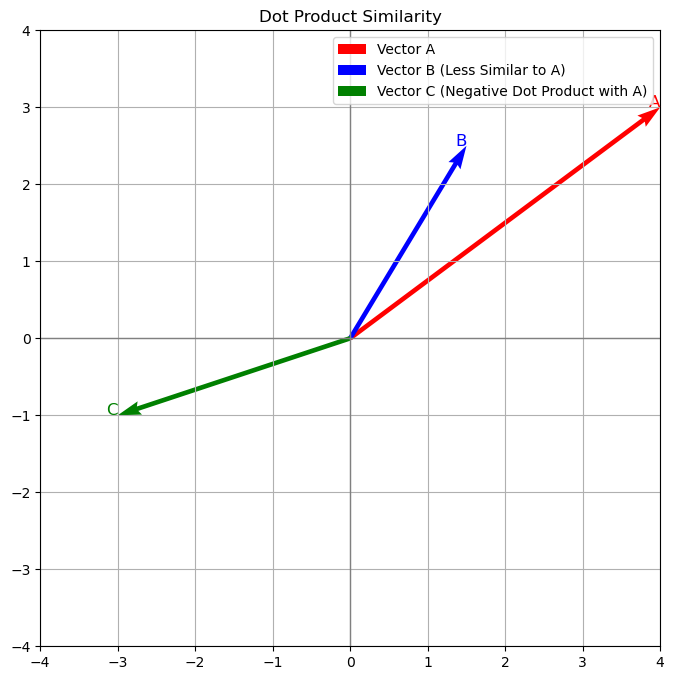

In [18]:
# Plot the vectors
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, vector_a[0], vector_a[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector A')
plt.quiver(0, 0, vector_b[0], vector_b[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector B (Less Similar to A)')
plt.quiver(0, 0, vector_c[0], vector_c[1], angles='xy', scale_units='xy', scale=1, color='g', label='Vector C (Negative Dot Product with A)')
# Set plot limits
plt.xlim(-4, 4)
plt.ylim(-4, 4)
# Add annotations
plt.text(vector_a[0], vector_a[1], 'A', fontsize=12, ha='right', color='r')
plt.text(vector_b[0], vector_b[1], 'B', fontsize=12, ha='right', color='b')
plt.text(vector_c[0], vector_c[1], 'C', fontsize=12, ha='right', color='g')
plt.title(f'Dot Product Similarity')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid()
plt.legend()
plt.show()


#### Dot Product Calculations:

1. Dot Product of A and B:
   $$
   \mathbf{A} \cdot \mathbf{B} = 4 \times 1.5 + 3 \times 2.5 = 6 + 7.5 = 13.5
   $$
   - This indicates a high degree of similarity.
  
  
2. Dot Product of A and C:
   $$
   \mathbf{A} \cdot \mathbf{C} = 4 \times (-3) + 3 \times (-1) = -12 - 3 = -15
   $$
    - This indicates they are dissimilar and pointing in opposite directions.

## 3.4 Self-Attention Mechanism

Self-attention is a mechanism that allows a model to weigh the importance of different tokens in a sequence relative to each other. It helps the model capture dependencies and relationships between tokens, irrespective of their positions.

### Calculation of Q, K, and V

Given an input sequence $X$ with embeddings, the Queries ($Q$), Keys ($K$), and Values ($V$) are computed through learned linear transformations:

$$
Q = XW_Q
$$

$$
K = XW_K
$$

$$
V = XW_V
$$

where:
- $X$ is the matrix of input embeddings.
- $W_Q$, $W_K$, and $W_V$ are the ***learned weight matrices*** for Queries, Keys, and Values, respectively.


### Self-Attention Function

The self-attention output is calculated using the following function:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

Here:
- $QK^T$ is the dot product of the Queries and the transpose of the Keys.
- $\frac{1}{\sqrt{d_k}}$ is a scaling factor where $d_k$ is the dimension of the Keys (or Queries).
- $\text{softmax}$ is applied to the scaled dot product to obtain the attention weights.
- These attention weights are then used to compute a weighted sum of the Values $V$.

This process allows the model to focus on different parts of the input sequence dynamically, enhancing its ability to understand context and relationships within the sequence.

## 3.5 Self-Attention in Action

In [19]:
# Step 1: Define the input sequence for the sentence "The cat sat on the mat"
X = np.array([[1, 0, 0],  # The
              [0, 1, 0],  # cat
              [0, 0, 1],  # sat
              [1, 1, 0],  # on
              [1, 0, 0],  # the
              [0, 1, 1]]) # mat

# Define the dimensions
embedding_dim = X.shape[1]
d_k = embedding_dim

# Step 2: Initialize weight matrices for Q, K, and V (randomly for this example)
np.random.seed(42)  # For reproducibility
W_Q = np.random.rand(embedding_dim, embedding_dim)
W_K = np.random.rand(embedding_dim, embedding_dim)
W_V = np.random.rand(embedding_dim, embedding_dim)


In [20]:
# Step 3: Compute the Q, K, and V matrices
Q = np.dot(X, W_Q)
K = np.dot(X, W_K)
V = np.dot(X, W_V)

# Step 4: Calculate the attention scores
scores = np.dot(Q, K.T) / np.sqrt(d_k)

# Step 5: Apply softmax to obtain attention weights
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

attention_weights = softmax(scores)

# Step 6: Compute the final output by multiplying attention weights with V
output = np.dot(attention_weights, V)

# Round all results to 3 decimal places
Q = np.round(Q, 3)
K = np.round(K, 3)
V = np.round(V, 3)
scores = np.round(scores, 3)
attention_weights = np.round(attention_weights, 3)
output = np.round(output, 3)

In [21]:
# Display the results
print("\nQ Matrix:")
print(Q)
print("\nK Matrix:")
print(K)
print("\nV Matrix:")
print(V)
print("\nAttention Scores:")
print(scores)
print("\nAttention Weights (after softmax):")
print(attention_weights)
print("\nOutput (Attention Weights Multipled by Values):")
print(output)



Q Matrix:
[[0.375 0.951 0.732]
 [0.599 0.156 0.156]
 [0.058 0.866 0.601]
 [0.973 1.107 0.888]
 [0.375 0.951 0.732]
 [0.657 1.022 0.757]]

K Matrix:
[[0.708 0.021 0.97 ]
 [0.832 0.212 0.182]
 [0.183 0.304 0.525]
 [1.541 0.233 1.152]
 [0.708 0.021 0.97 ]
 [1.016 0.517 0.707]]

V Matrix:
[[0.432 0.291 0.612]
 [0.139 0.292 0.366]
 [0.456 0.785 0.2  ]
 [0.571 0.583 0.978]
 [0.432 0.291 0.612]
 [0.596 1.077 0.566]]

Attention Scores:
[[0.574 0.373 0.428 0.948 0.574 0.802]
 [0.334 0.323 0.138 0.657 0.334 0.461]
 [0.371 0.197 0.34  0.568 0.371 0.538]
 [0.908 0.697 0.566 1.605 0.908 1.263]
 [0.574 0.373 0.428 0.948 0.574 0.802]
 [0.705 0.52  0.478 1.225 0.705 0.999]]

Attention Weights (after softmax):
[[0.156 0.128 0.135 0.227 0.156 0.196]
 [0.158 0.156 0.13  0.218 0.158 0.179]
 [0.161 0.135 0.156 0.196 0.161 0.19 ]
 [0.144 0.116 0.102 0.289 0.144 0.205]
 [0.156 0.128 0.135 0.227 0.156 0.196]
 [0.15  0.125 0.12  0.253 0.15  0.202]]

Output (Attention Weights Multipled by Values):
[[0.462 0.57

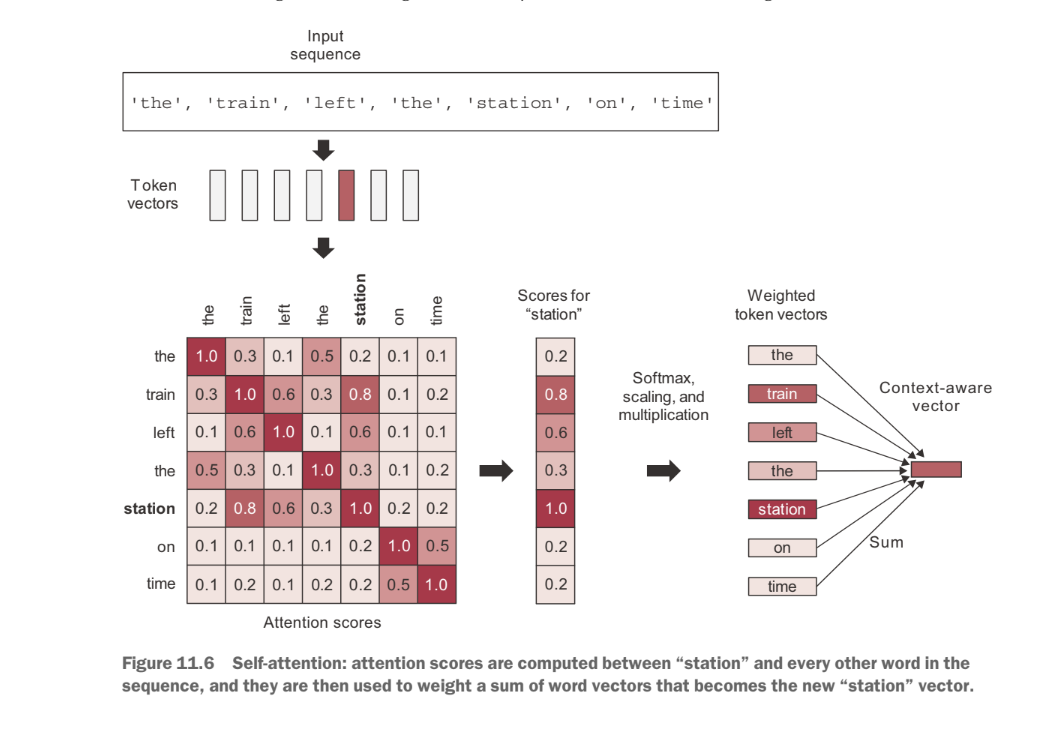

# *Speaker Notes*
In self-attention, each vector representing a token is transformed by considering its relationships with all other tokens in the sequence. This transformation results in a new vector for each token that captures the context and dependencies from the entire sequence.

# 3.6 From Attention to Transformers

- Multi-Head Attention
- Position-Wise Feed-Forward Networks
- Add & Norm
- Positional Encoding
- Stacking Layers
- Encoder-Decoder Architecture

### 3.6.1 Multi-Head Attention 

- Multiple Parallel Attention Layers
- Diverse Feature Extraction
- Concatenation and Projection
- Enhanced Contextual Understanding


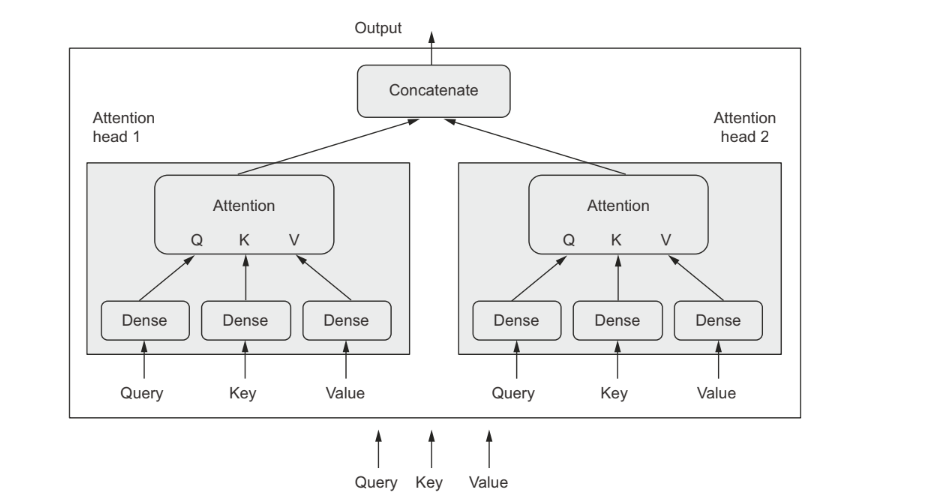

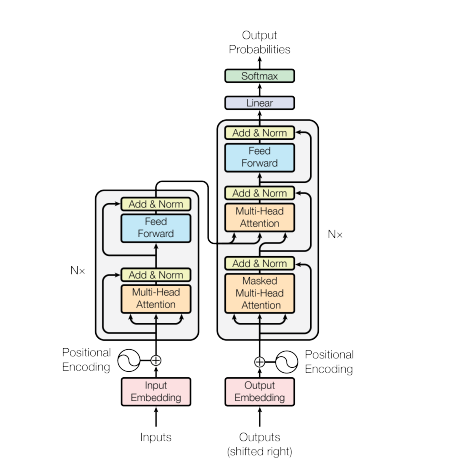


- "Attention is All You Need" Transformer: Uses both an encoder and a decoder, suitable for sequence-to-sequence tasks like translation.
- GPT Transformer: Uses only the decoder (right-hand side), focusing on autoregressive text generation. 
    - Casual self-attention - ensure that each word is only looking at the past rather than at the future. 

# *Speaker Notes* Notes - from Attention to Transformers 


1. **Multi-Head Attention**: This mechanism allows the model to jointly attend to information from different representation subspaces at different positions. Instead of performing a single attention function, it runs multiple attention mechanisms in parallel (heads). The outputs are then concatenated and linearly transformed into the expected dimension.

2. **Position-Wise Feed-Forward Networks**: Following multi-head attention, the output undergoes further processing through a feed-forward neural network, applied independently to each position. This consists of two linear transformations with a ReLU activation in between.

3. **Add & Norm**: Both the multi-head attention and feed-forward sub-layers are followed by residual connections and layer normalization. This means the input to each sub-layer is added to the output of the sub-layer (residual connection), and then layer normalization is applied.

4. **Positional Encoding**: Since the Transformer architecture does not inherently understand the order of tokens, positional encoding is added to the input embeddings to inject information about the position of the tokens in the sequence.

5. **Stacking Layers**: The Transformer model is composed of multiple layers of the above components (multi-head attention, feed-forward networks, add & norm). This stack allows the model to capture complex dependencies and relationships in the data.

6. **Encoder-Decoder Architecture**: The Transformer consists of an encoder and a decoder. The encoder processes the input sequence to create a context-rich representation, while the decoder uses this representation along with the previously generated tokens to produce the output sequence. Both the encoder and decoder have their own stacks of layers.


## *Speaker Notes* Notes - Multi-Head Attention 



Multi-Head Attention: This mechanism allows the model to jointly attend to information from different representation subspaces at different positions. Instead of performing a single attention function, it runs multiple attention mechanisms in parallel (heads). The outputs are then concatenated and linearly transformed into the expected dimension.


# 4. Building Our Own GPT
- **Generative Pre-Trained Transformer**

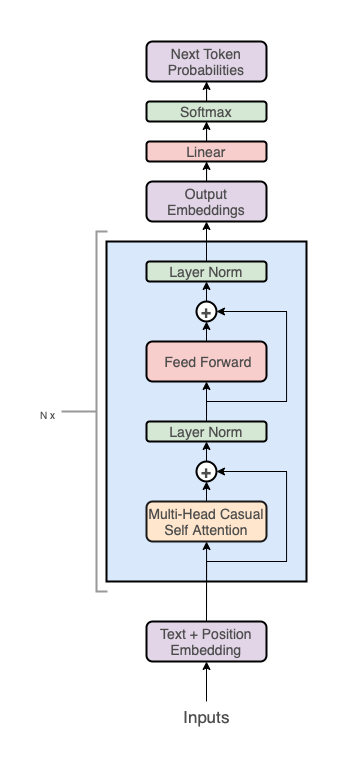


- Generative - generates text
- Pre-trained - has been trained on large amounts of text from the internet. GPT-2 was trained on 45GB of text or about 10 billion words. 
- Transformer - decoder only


- implement a GPT with numpy 

- load the trained GPT-2 weights (I don't have a bunch of GPUs lying aroud this house so we'll take the publically available weights) 

In [22]:
import os
os.chdir("picoGPT")

In [23]:
# !git clone https://github.com/jaymody/picoGPT.git

In [24]:
 # !pip install -r requirements.txt

In [25]:
# GELU activation function used in GPT models
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))


In [26]:
# Softmax function for transforming values into probabilities
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)


In [27]:
# Layer normalization to normalize the input and improve training stability
def layer_norm(x, g, b, eps: float = 1e-5):
    mean = np.mean(x, axis=-1, keepdims=True)
    variance = np.var(x, axis=-1, keepdims=True)
    x = (x - mean) / np.sqrt(variance + eps)  # normalize x to have mean=0 and var=1 over last axis
    return g * x + b  # scale and offset with gamma/beta params

- Layer Normalization: Normalizes the inputs across the features.
- Mean and Variance: Calculated across the last axis.
- Epsilon (eps): A small number to avoid division by zero.
- Scale (g) and Shift (b): Parameters learned during training.
- Purpose: Stabilizes and accelerates training by normalizing inputs.

In [28]:
# Linear transformation (fully connected layer)
def linear(x, w, b):  # [m, in], [in, out], [out] -> [m, out]
    return x @ w + b

- Linear Layer: Performs a linear transformation.
- Matrix Multiplication (@): Multiplies input x with weights w.
- Bias Addition (b): Adds bias to the result.
- Purpose: Applies a learned linear transformation to the input data.

In [29]:
# Feed-forward network component of the transformer
def ffn(x, c_fc, c_proj):  # [n_seq, n_embd] -> [n_seq, n_embd]
    # project up
    a = gelu(linear(x, **c_fc))  # [n_seq, n_embd] -> [n_seq, 4*n_embd]

    # project back down
    x = linear(a, **c_proj)  # [n_seq, 4*n_embd] -> [n_seq, n_embd]

    return x

Feed Forward Network: Consists of two linear transformations with a GELU activation in between.

In [30]:
# Scaled dot-product attention mechanism
def attention(q, k, v, mask):  # [n_q, d_k], [n_k, d_k], [n_k, d_v], [n_q, n_k] -> [n_q, d_v]
    return softmax(q @ k.T / np.sqrt(q.shape[-1]) + mask) @ v

# Multi-head attention mechanism
def mha(x, c_attn, c_proj, n_head):  # [n_seq, n_embd] -> [n_seq, n_embd]
    # qkv projection
    x = linear(x, **c_attn)  # [n_seq, n_embd] -> [n_seq, 3*n_embd]

    # split into qkv
    qkv = np.split(x, 3, axis=-1)  # [n_seq, 3*n_embd] -> [3, n_seq, n_embd]

    # split into heads
    qkv_heads = list(map(lambda x: np.split(x, n_head, axis=-1), qkv))  # [3, n_seq, n_embd] -> [3, n_head, n_seq, n_embd/n_head]

    # causal mask to hide future inputs from being attended to
    causal_mask = (1 - np.tri(x.shape[0], dtype=x.dtype)) * -1e10  # [n_seq, n_seq]

    # perform attention over each head
    out_heads = [attention(q, k, v, causal_mask) for q, k, v in zip(*qkv_heads)]  # [3, n_head, n_seq, n_embd/n_head] -> [n_head, n_seq, n_embd/n_head]

    # merge heads
    x = np.hstack(out_heads)  # [n_head, n_seq, n_embd/n_head] -> [n_seq, n_embd]

    # out projection
    x = linear(x, **c_proj)  # [n_seq, n_embd] -> [n_seq, n_embd]

    return x

In [31]:
# Single transformer block consisting of multi-head attention and feed-forward network
def transformer_block(x, mlp, attn, ln_1, ln_2, n_head):  # [n_seq, n_embd] -> [n_seq, n_embd]
    # multi-head causal self attention
    x = x + mha(layer_norm(x, **ln_1), **attn, n_head=n_head)  # [n_seq, n_embd] -> [n_seq, n_embd]

    # position-wise feed forward network
    x = x + ffn(layer_norm(x, **ln_2), **mlp)  # [n_seq, n_embd] -> [n_seq, n_embd]

    return x

- Transformer Block: A single block in a Transformer model.
    - Multi-Head Attention: Applies attention after layer normalization.
    - Feed Forward Network: Applies FFN after another layer normalization.
    - Residual Connections: Adds the input to the output of each sub-layer to help with gradient flow.
    - Purpose: Builds the core of the Transformer architecture by stacking multiple such blocks.

In [32]:
# The main GPT-2 model
def gpt2(inputs, wte, wpe, blocks, ln_f, n_head):  # [n_seq] -> [n_seq, n_vocab]
    # token + positional embeddings
    x = wte[inputs] + wpe[range(len(inputs))]  # [n_seq] -> [n_seq, n_embd]

    # forward pass through n_layer transformer blocks
    for block in blocks:
        x = transformer_block(x, **block, n_head=n_head)  # [n_seq, n_embd] -> [n_seq, n_embd]

    # projection to vocab
    x = layer_norm(x, **ln_f)  # [n_seq, n_embd] -> [n_seq, n_embd]
    return x @ wte.T  # [n_seq, n_embd] -> [n_seq, n_vocab]

- GPT-2 Model: A generative pre-trained transformer.
    - Embeddings (wte, wpe): Converts input tokens and their positions to vectors.
    - Transformer Blocks: Applies a series of transformer blocks to the input.
    - Final Layer Normalization (ln_f): Normalizes the final output.
    - Projection to Vocabulary: Projects the output to the vocabulary space to predict the next token.
    - Purpose: Generates text by predicting the next token in a sequence.

In [33]:
# Function to generate text given a prompt
def generate(inputs, params, n_head, n_tokens_to_generate):
    from tqdm import tqdm

    for _ in tqdm(range(n_tokens_to_generate), "generating"):  # auto-regressive decode loop
        logits = gpt2(inputs, **params, n_head=n_head)  # model forward pass
        next_id = np.argmax(logits[-1])  # greedy sampling
        inputs.append(int(next_id))  # append prediction to input

    return inputs[len(inputs) - n_tokens_to_generate :]  # only return generated ids


- Text Generation: Generates text by iteratively predicting the next token.
    - Auto-Regressive Loop: Continuously generates new tokens based on the previous tokens.
    - Greedy Sampling: Chooses the token with the highest probability at each step.
    - Purpose: Produces coherent and contextually relevant text sequences.

In [34]:
# Main function to run the GPT-2 model
def main(prompt: str, n_tokens_to_generate: int = 38, model_size: str = "124M", models_dir: str = "models"):
    from utils import load_encoder_hparams_and_params

    # load encoder, hparams, and params from the released open-ai gpt-2 files
    encoder, hparams, params = load_encoder_hparams_and_params(model_size, models_dir)

    # encode the input string using the BPE tokenizer
    input_ids = encoder.encode(prompt)

    # make sure we are not surpassing the max sequence length of our model
    assert len(input_ids) + n_tokens_to_generate < hparams["n_ctx"]

    # generate output ids
    output_ids = generate(input_ids, params, hparams["n_head"], n_tokens_to_generate)

    # decode the ids back into a string
    output_text = encoder.decode(output_ids)

    return output_text



- Main Function: Orchestrates the text generation process.
    - Load Model Parameters: Loads the necessary parameters and configurations.
    - Encode Prompt: Converts the input text to token IDs.
    - Generate Text: Calls the generate function to produce the output tokens.
    - Decode Output: Converts the generated token IDs back to text.
    - Purpose: Provides an interface to generate text given an initial prompt.

In [35]:
# Run the model
prompt = "what do you know about gpt5? " # '..are lost' J. R. R. Tolkein
output_text = main(prompt)
print(output_text)


generating: 100%|██████████████████████████████████████████████████████████████████████| 38/38 [00:11<00:00,  3.42it/s]


 I'm not sure if you know about it, but I'm sure you know about it.  I'm not sure if you know about it, but I'm sure you know


# *Speaker Notes* Pretraining vs Instruction Tuning 
### Pretraining

1. **Objective**: Train the model to predict the next word in a sentence, learning general language patterns and knowledge.
2. **Data**: Uses a vast and diverse corpus of unlabeled text from the internet.
3. **Process**: Involves large-scale training to understand grammar, facts, and reasoning.
4. **Outcome**: Produces a general-purpose language model capable of generating coherent text.

### Instruction Tuning

1. **Objective**: Refine the pretrained model to follow specific instructions and perform particular tasks.
2. **Data**: Uses labeled datasets with clear instructions and desired outputs.
3. **Process**: Fine-tunes the model using supervised learning and reinforcement learning from human feedback.
4. **Outcome**: Enhances the model's ability to follow instructions and produce task-specific outputs.

### Comparison

- **Scope**: Pretraining is broad and general; instruction tuning is narrow and specific.
- **Data Requirement**: Pretraining uses diverse, unlabeled text; instruction tuning uses high-quality, labeled data.
- **Complexity**: Pretraining is more resource-intensive; instruction tuning is focused and task-specific.
- **Integration**: Pretraining provides foundational knowledge; instruction tuning customizes the model for specific applications.

## 4.1 Limitations

1. Efficiency
2. Scalability
3. Training
4. Preprocessing and Tokenization
5. Optimization Techniques

This script demonstrates a simplified implementation of the GPT-2 architecture. However, it has several limitations compared to a real GPT-2 model:

1. **Efficiency**: This code is written in pure NumPy, which is not optimized for performance compared to frameworks like TensorFlow or PyTorch used in real GPT models. These frameworks leverage hardware acceleration, which is crucial for training and inference of large models.

2. **Scalability**: Real GPT models are trained on massive datasets using distributed computing across many GPUs or TPUs. This script lacks the infrastructure to handle such large-scale data and computation.

3. **Training**: The script only implements inference (generating text) and does not cover the training process. Training involves gradient descent, backpropagation, and other techniques not addressed here.

4. **Preprocessing and Tokenization**: The script uses a placeholder for loading pre-trained models and tokenizers (`load_encoder_hparams_and_params`). In practice, these components are complex and involve handling various languages, subword tokenization, and more.

5. **Optimization Techniques**: Real GPT models use advanced techniques like mixed-precision training, gradient accumulation, and various forms of regularization that are not covered in this simplified version.


## 4.2 Next Steps 
1. Learn Deep Learning Frameworks
2. Understand Training Processes
3. Advanced Preprocessing
4. Model Architectures
5. Performance Optimization
6. Experiment with Pre-trained Models

~~1. Learn Deep Learning Frameworks~~  
~~2. Understand Training Processes~~  
~~3. Advanced Preprocessing~~  
~~4. Model Architectures~~  
~~5. Performance Optimization~~  
~~6. Experiment with Pre-trained Models~~
### 0. Watch Karpathy
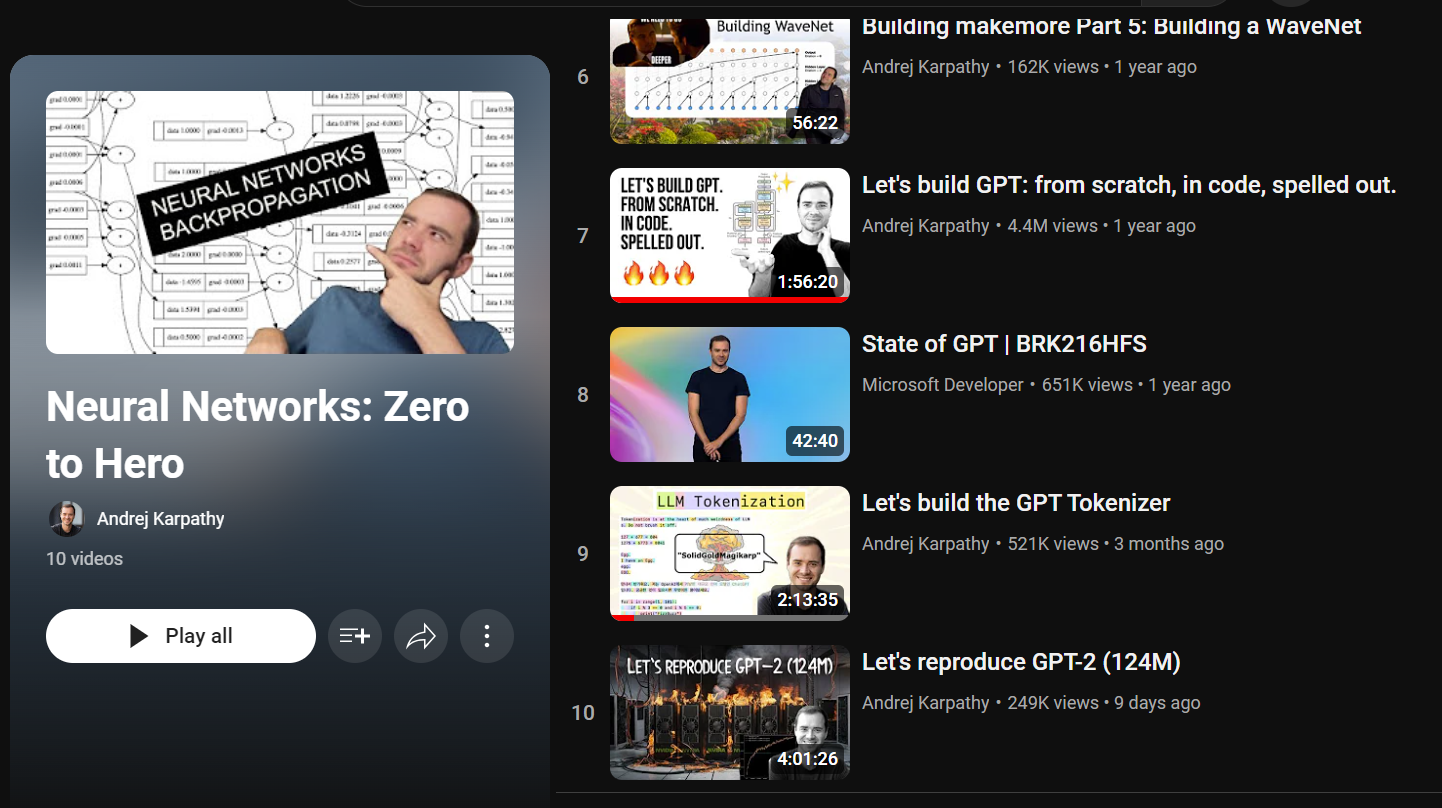

# *Speaker Notes - Next Steps*

To deepen their understanding and approach a full implementation of GPT-2 or similar models, students should:

1. **Learn Deep Learning Frameworks**: Study TensorFlow or PyTorch, focusing on their capabilities for defining, training, and deploying neural networks.

2. **Understand Training Processes**: Explore how models are trained, including loss functions, backpropagation, optimization algorithms (like Adam), and handling large-scale datasets.

3. **Advanced Preprocessing**: Dive into tokenization techniques, especially Byte Pair Encoding (BPE), and understand how text data is prepared for model training.

4. **Model Architectures**: Study the architecture of transformers in more detail, including encoder-decoder models, attention mechanisms, and improvements like the Transformer-XL and GPT-3.

5. **Performance Optimization**: Learn about techniques to optimize performance, such as distributed training, mixed-precision training, and using accelerators like GPUs and TPUs.

6. **Experiment with Pre-trained Models**: Use libraries like Hugging Face’s Transformers to experiment with pre-trained models, fine-tuning them for specific tasks, and understanding the practical aspects of deploying these models.

These steps will help students bridge the gap between this simplified implementation and the sophisticated architectures used in state-of-the-art language models.


# 5. Wrap-up

## 5.1 References and Resources

References:
* Hands on Machine Learning with Scikit-Learn, Keras and Tensorflow by Aurélien Géron Third Edition, Chapter 10 - Introduction to Artificial Neural Networks with Keras https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/
* Building GPT implentation adapted from https://github.com/jaymody/picoGPT
* Deep Learning with Python by François Chollet https://www.manning.com/books/deep-learning-with-python-second-edition
* Notes from Dr. James McDermott https://github.com/jmmcd
* The Unreasonable Effectiveness of Recurrent Neural Networks https://karpathy.github.io/2015/05/21/rnn-effectiveness/
* Gradient Descent Image taken from https://www.youtube.com/watch?v=IHZwWFHWa-w&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=2

# 6. Join Our Community - AI Builders Doing Data Better


## https://join.slack.com/t/aibuildersdoi-r364563/shared_invite/zt-2jvy7wew5-8AbqI5Gf6vaUukTEnf2S1Q